# **Studi Predictive Analytics : Harga penjualan Mobil Yang telah dipakai (Bekas)**

Model yang dibuat menggunakan tiga model yaitu K-Nearest Neighbor, Random Forest, Boosting Algorithm. Kita akan memprediksi harga penjualan mobil berdasarkan berdasarkan beberapa fitur yang tersedia. Dengan ketiga algoritma model yg disebutkan, selanjutnya akan dianalisis algoritma mana yang memberikan hasil prediksi terbaik.


## **Time Series**

Time series dapat dipahami sebagai kumpulan nilai yang tersusun secara runtut dalam rentang waktu tertentu.

## **Dataset**

Dataset yang digunakan menggunakan dataset Vehicle dataset yaitu CAR DETAILS FROM CAR DEKHO.csv yang bisa ditemukan di https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho Dataset ini memiliki 14340 baris dan 8 columns kolom. Kolom yang terdapat pada dataset ini yakni name (nama/jenis mobil), year(Tahun rilis mobil), selling_price(Harga penjualan), km_driven(Total angka kilometer yang telah ditempuh), fuel(Jenis bahan bakar), seller_type(Tipe penjual), transmission(jenis transmisi), owner(bekas pemilik ke - ) atau mobil bekas test percobaan.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


## **Membaca data menggunakan Pandas**

Disini kita dataset akan dibaca dengan menggunakan library pandas yaitu car_data.csv yg sebelumnya bernama CAR DETAILS FROM CAR DEKHO. pandas membaca data frame car_data.csv melalui link path google drive yang disimpan di dalam variabel url.

In [ ]:
url = '/content/drive/MyDrive/Dicoding/way/Mchine learning terapan/car_data.csv'
cars = pd.read_csv(url)
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## **Melihat tipe data**

Dengan menggunakan method info, kita bisa melihat informasi dan tipe data. Terdapat 4340 non-null  yang artinya tidak ada data kosong/missing value. Terdapat pula tipe data object/kategorik seperti: name, fuel, seller_type,transmission, owner. Tipe data integer: year, selling_price, km_driven.

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## **Memeriksa nilai statistika deskriptif pada dataset**
Statistika deskriptif digunakan untuk menggambarkan/summary dataset. Seperti : nilai mean, median, modus, variance, standar deviasi, quartile, range dan sejenisnya. Untuk melihat nilai-nilai tersebut maka digunakan method describe() . Dapat dilihat bahwa pada nilai min/minimum tidak terdapat angka 0 yang artinya tidak terdapat missing value.



In [ ]:
cars.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## **Memeriksa apakah terdapat nilai missing value pada setiap kolom data**
Dengan memanggil method isnull() serta menambahkan method sum() kita bisa tau jumlah missing value pada tiap kolom data. Dan ternyata masing-masing kolom jumlah missing valuenya adalah 0 atau tidak terdapat nilai missing value


In [ ]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## **Memeriksa apakah terdapat outlier dengan visualisai**
Nilai outliers merupakan data yang menyimpang terlalu jauh dari data yang lainnya dalam suatu rangkaian data (pencilan). Nilai pencilan ini dapat menyebabkan distorsi terhadap nilai yang asli.

Untuk melihat outlier dapat menggunakan visualisasi dengan boxplot, pada visualisasi di bawah ini nilai outlier dapat dilihat sebagai titik-titik di luar batas minimum/maksimum


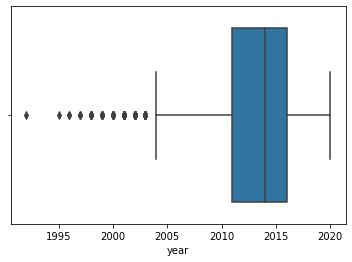

In [ ]:
sns.boxplot(x=cars['year'])

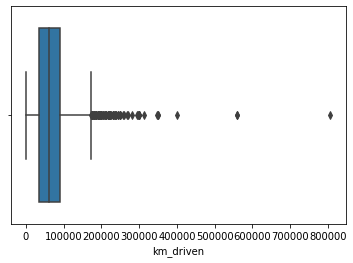

In [ ]:
sns.boxplot(x=cars['km_driven'])

## **Menangani Outlier Menggunakan Interquartile**
Dengan menggunakan interquartil, nilai pencilan yang melebihi nilai Quartil 1 (Q1) akan diubah menjadi nilai Q1. Sementara itu, nilai pencilan yang kurang dari nilai Quartil 3 (Q3) akan diubah nilainya menjadi nilai Q3. kemudian membuat variabel batas atas dan batas bawah karena outlier berada diluar jangkauan itu. Kemudian yang terakhir menyaring data-data yang ada pada rentang batas bawah - batas atas sehingga outlier yang berada di luar batas bawah - batas atas tidak disertakan.

In [ ]:
Q1 = cars.quantile(0.25)
Q3 = cars.quantile(0.75)

IQR=Q3-Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR
cars=cars[~((cars<(batas_bawah))|(cars>(batas_atas))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
cars.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(3858, 8)

## Univariate Analysis
Membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [ ]:
numerical_features = ['selling_price', 'year', 'km_driven']
categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

## Categorical Features

                                            jumlah sampel  persentase
Maruti Swift Dzire VDI                                 68         1.8
Maruti Alto 800 LXI                                    59         1.5
Maruti Alto LXi                                        45         1.2
Hyundai EON Era Plus                                   35         0.9
Maruti Alto LX                                         33         0.9
...                                                   ...         ...
Mahindra Scorpio VLX 2.2 mHawk Airbag BSIV              1         0.0
Tata Indigo LS Dicor                                    1         0.0
Ford Figo 1.2P Ambiente MT                              1         0.0
Tata New Safari Dicor EX 4X2 BS IV                      1         0.0
Hyundai i20 Magna 1.4 CRDi                              1         0.0

[1317 rows x 2 columns]


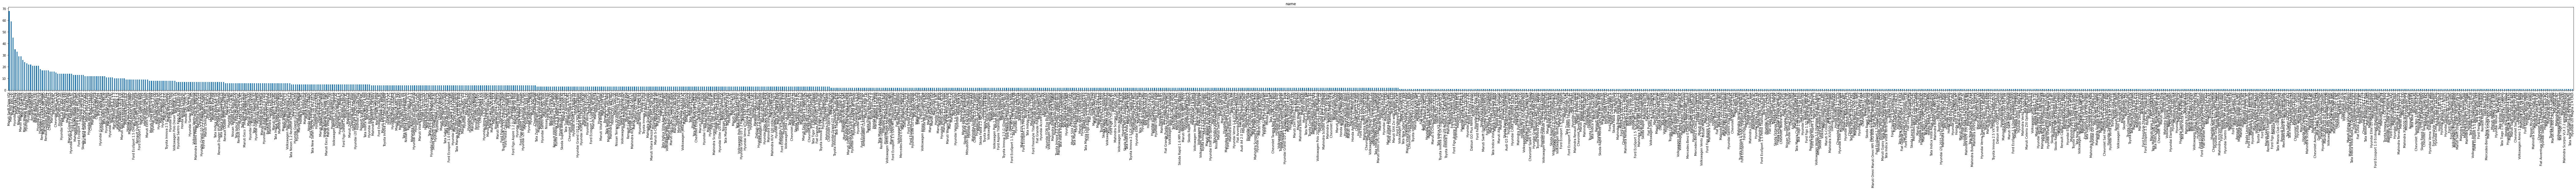

<Figure size 432x288 with 0 Axes>

In [ ]:
feature = categorical_features[0]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
f = plt.figure()
f.set_figwidth(150)
f.set_figheight(5)
count.plot(kind='bar', title=feature);
f = plt.figure()

Pada grafik di atas terdapat ratusan kategori, namun terdapat 5 kategori pada fitur name, secara berurutan dari jumlahnya yang paling banyak yaitu: Maruti Swift Dzire VDI, Maruti Alto 800 LXI, Maruti Alto LXi, Hyundai EON Era Plus, dan Maruti Alto LX. Dapat disimpulkan bahwa lebih dari 3 % mobil yang dijual berjenis Maruti series.

          jumlah sampel  persentase
Petrol             1995        51.7
Diesel             1800        46.7
CNG                  40         1.0
LPG                  22         0.6
Electric              1         0.0


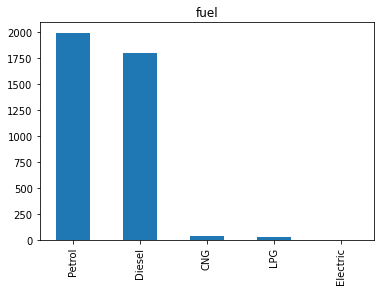

In [ ]:
feature = categorical_features[1]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori Jenis bahan bakar pada mobil kendaraan banyak digunakan yaitu berjenis Petrol dan Diesel. Kemudian untuk tipe mobil yang menggunakan listrik adalah yang paling sedikit.

                  jumlah sampel  persentase
Individual                 2916        75.6
Dealer                      853        22.1
Trustmark Dealer             89         2.3


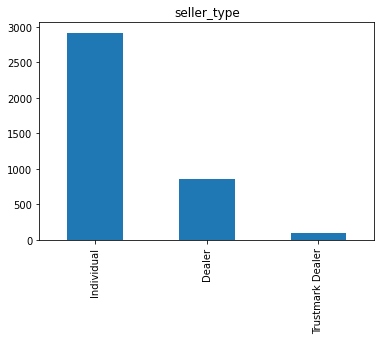

In [ ]:
feature = categorical_features[2]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel, fitur jenis penjuallan terdiri 3 kategori yaitu individual, Dealer, Trustmark Dealer. Dapat didimpulkan pula bahwa kebanyakan mobil bekas dijual secara perorangan (individual)

           jumlah sampel  persentase
Manual              3609        93.5
Automatic            249         6.5


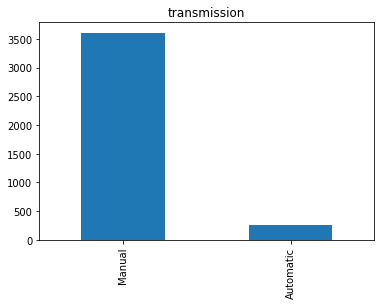

In [ ]:
feature = categorical_features[3]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel bahwa mobil bekas yang dijual kebanyakan menggunakan transmisi manual ketimbang transmisi otomatis.

                      jumlah sampel  persentase
First Owner                    2526        65.5
Second Owner                   1011        26.2
Third Owner                     247         6.4
Fourth & Above Owner             60         1.6
Test Drive Car                   14         0.4


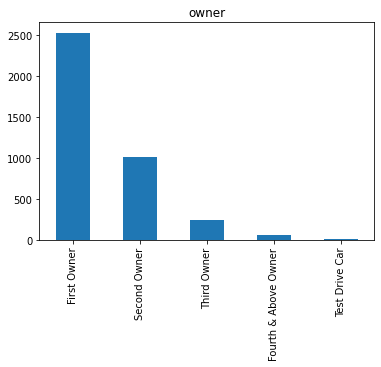

In [ ]:
feature = categorical_features[4]
count = cars[feature].value_counts()
percent = 100*cars[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Pada visualisasi diatas menunjukan seberapa banyak jenis mobil yang dijual bekas orang ke- sekian dan juga bekas mobil untuk latihan. Dapat disimpulkan  bahwa mobil bekas dengan orang pertama (pemilik pertama) yang dijual paling banyak selain pemilik ketimbang pemilik ke 2,3,4 dan seterusnya. Kemudian mobil bekas latihan paling sedikit tersedia.

#### Numerical Features

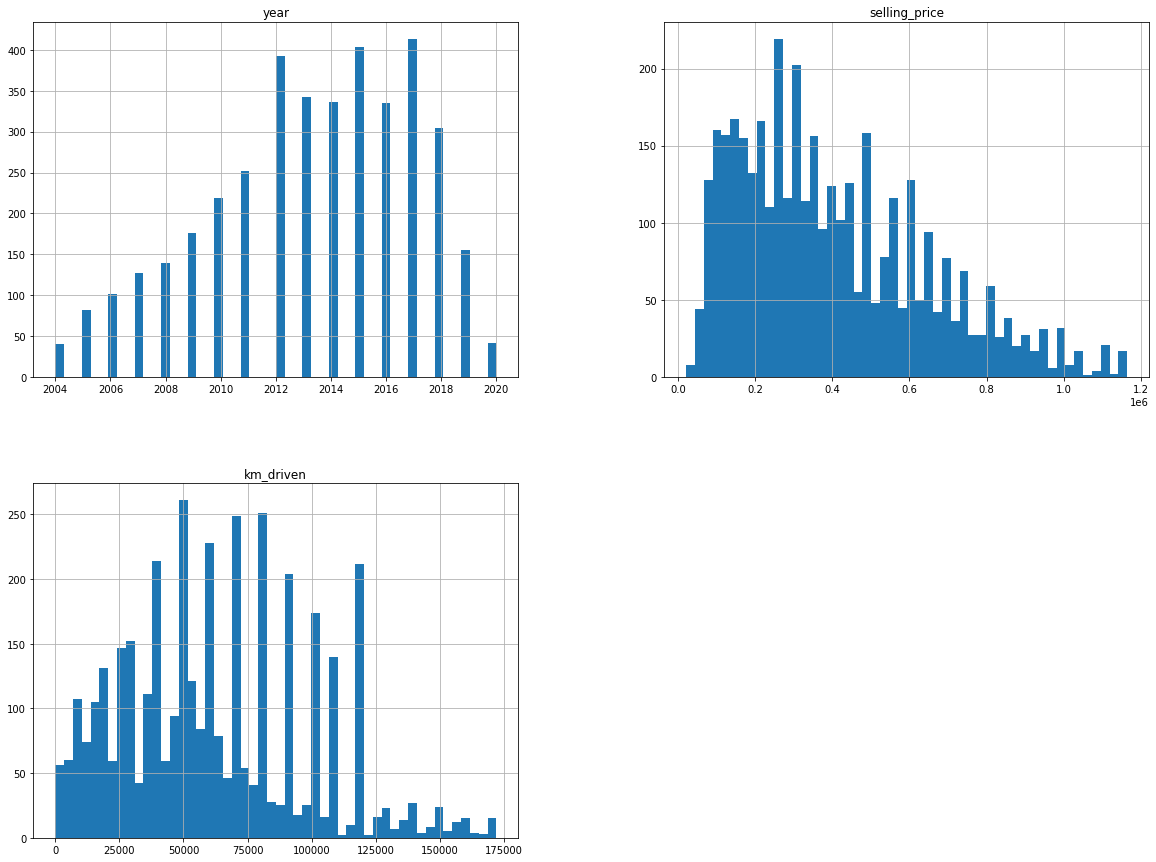

In [ ]:
cars.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan visualisasi histogram di atas kita dapat beberapa insight yaitu :

- Mobil bekas yang paling banyak dijual yaitu mobil pada keluaran tahun 2018,2016, 2012. Kemudian yang paling sedikit yaitu mobil keluaran 2020 dan 2004.
- Peningkatan harga mobil bekas sebanding dengan jumlah mobil yang ada walaupun terdapat kenaikan sedikit.
- Mobil bekas yang dijual paling banyak yaitu mobil yang sudah dipakai dengan kilometer 50000

## Multivariate Analysis

#### Categorical Features

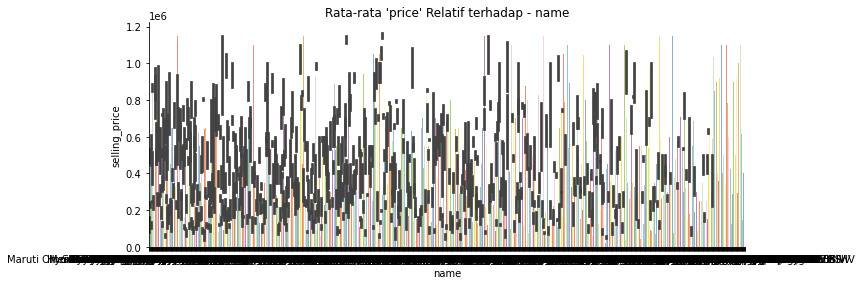

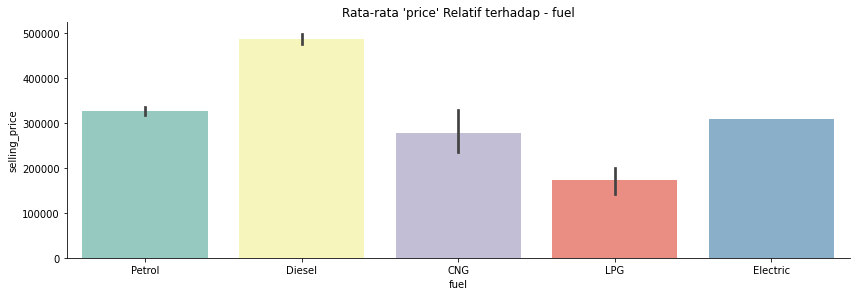

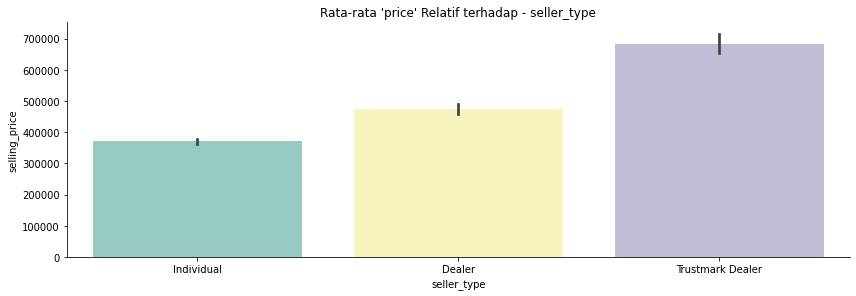

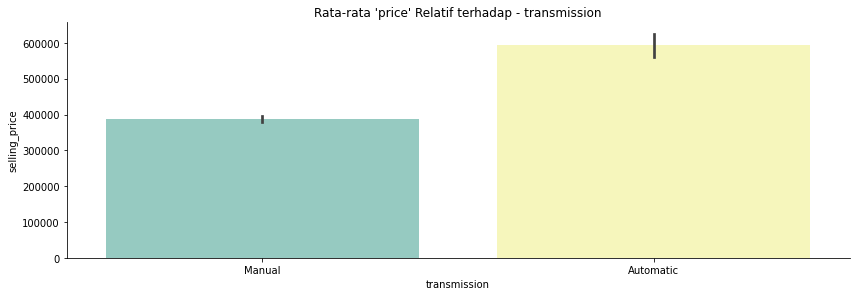

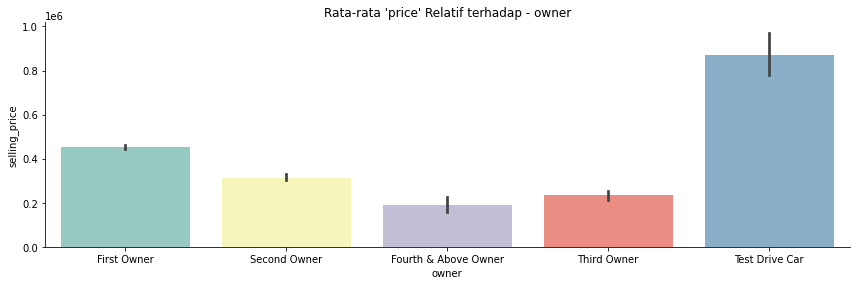

In [ ]:
cat_features = cars.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height = 4, aspect = 3,  data=cars, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, maka kita bisa simpulkan bahwa:
- Pada fitur fuel(jenis bahan bakar) harga paling tinggi yaitu pada kategori Diesel, kemudian diikuti oleh Petrol dan Electric.
- Pada fitur seller_type(tipe penjualan) harga paling tinggi yaitu jika membeli mobil bekas di Trustmark Dealer(Dealer terpercaya) sedangkan harga paling murah jika membeli secara Individual (peorangan) atau dari tangan ke tangan
- Pada fitur transmisi(jenis transmisi pada mobil) dapat dikatakan bahwa mobil dengan transmisi otomatis cenderung lebih mahal dibanding dengan mobil dengan transmisi manual
- Pada fitur owner(pemilik ke-/kepemilikan) dapat disimpulkan bahwa mobil bekas pada mobil yang digunakan untuk pelatihan memiliki harga yang paling tinggi ketimbang mobil yang telah dibeli orang. Kemudian juga semakin mobil bekas itu beralih tangan (pemilik ke1,2,3,4 dsb) maka harga mobil semakin turun.

#### Numerical Features

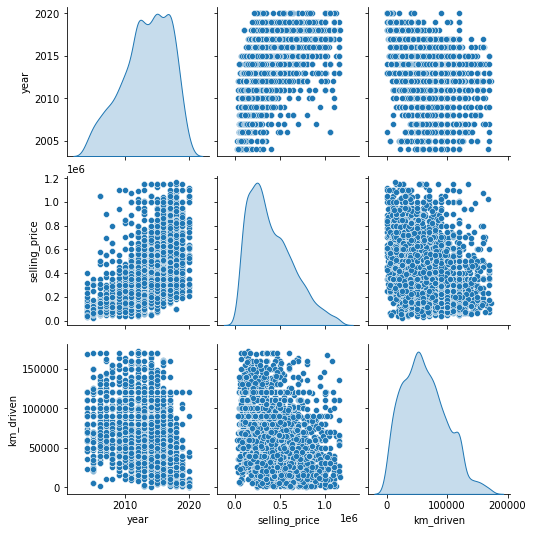

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(cars, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

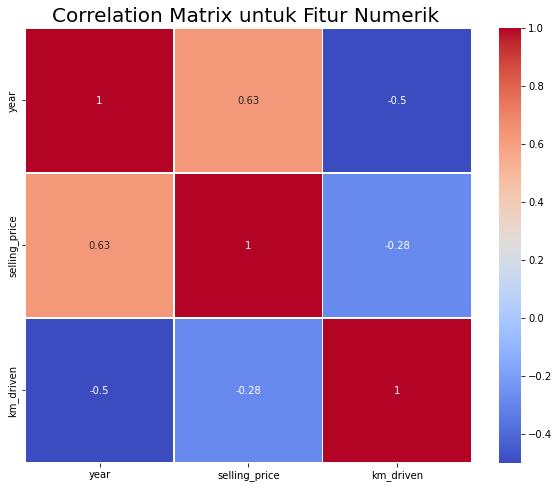

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = cars.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Pada grafik korelasi matrix di atas antara fitur (year dan km_driven) terhadap target (selling_price) terlihat bahwa tidak terdapat nilai korelasi yang mendekati 0 terhadap target. Nilai korelasi antara fitur year terhadap selling_price yaitu 0.63, dan fitur km_driven terhadap selling_price yaitu -0.28. Jadi tidak perlu ada yang didrop

In [ ]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Data Preparation

#### Encoding Fitur Kategori

Karena data yang bisa diproses oleh model adalah data berupa angka maka perlu melakukan proses one-hot encoding yaitu merubahnya menjadi numerik dengan memanfaatkan library Library scikit-learn.

In [ ]:
cars = pd.concat([cars, pd.get_dummies(cars['name'], prefix='name')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['fuel'], prefix='fuel')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['seller_type'], prefix='seller_type')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['transmission'], prefix='transmission')],axis=1)
cars = pd.concat([cars, pd.get_dummies(cars['owner'], prefix='owner')],axis=1)
cars.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1, inplace=True)
cars.head()

,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A6 2.7 TDI,name_Audi A6 2.8 FSI,name_Audi Q3 2.0 TDI Quattro Premium Plus,name_Audi Q5 2.0 TFSI Quattro,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Train-Test-Split

Pada proses split dataset yaitu menggunakan proporsi 0.2 engan fungsi train_test_split dari sklearn. Split dataset menjadi data train dan data test sebelum transformasi dilakukan supaya transformasi diterapkan hanya pada data latih.

In [ ]:
X = cars.drop(["selling_price"],axis =1)
y = cars["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

**Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji**

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3858
Total # of sample in train dataset: 3086
Total # of sample in test dataset: 772


#### Standarisasi 
StandardScaler yaitu proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. Kemudian menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Untuk pertama kali yang akan dilakukan standarisasi yaitu pada data latih, Tujuannya adalah menghindari kebocoran informasi pada data uji.

In [ ]:
numerical_features = ['year', 'km_driven']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,year,km_driven
2309,0.994659,-1.203933
3708,-0.334367,-0.626835
2408,0.197244,0.527361
1888,-0.068562,0.197591
883,-1.131782,0.472399


 mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

In [ ]:
X_train[numerical_features].describe().round(4)

,year,km_driven
count,3086.0000,3086.0000
mean,0.0000,0.0000
std,1.0002,1.0002
min,-2.4608,-1.7260
25%,-0.6002,-0.7642
50%,0.1972,-0.0772
75%,0.7289,0.7472
max,1.7921,3.0006


# Model Development

Menyiapkan dataframe untuk analisis model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

#### KNN
cara kerja algoritma KNN yaitu memprediksi nilai dari setiap data yang baru menggunakan pendekatan "kesamaan fitur". Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

#### Random Forest
Random forest merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama

In [ ]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

#### Boosting Algorithm
Boosting Algorithm yaitu model bekerja dengan membangun model dari data latih kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

melakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

**Evaluasi ketiga model dengan metrik MSE**

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse.round(4)

,train,test
KNN,18021811.061488,158488424.342521
RF,8714550.337457,93014945.67293
Boosting,28188844.648295,85162311.312098


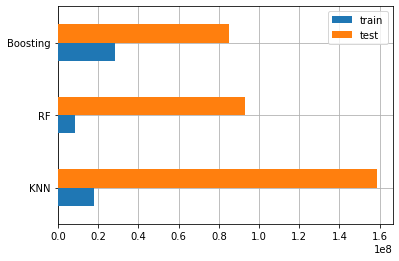

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan gambar di atas, terlihat model Random Boosting Algorithm memberikan nilai eror yang paling kecil. Dan model dengan Random Forest juga memiliki eror tidak jauh berbeda namun berpotensi mengalami over fitting. Sedangkan model KNN memiliki nilai error yang paling besar.

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1154,245000,94500.0,119199.2,177040.2


Hasil prediksi yang paling mendekati nilai asli yaitu dengan menggunakan algoritma Bossting.